In [11]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
import scipy
from scipy import stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

In [12]:
# dir for mac

sst_file_dir = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/OISST/northeast_sst.nc"
prec_file_dir = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/TRMM/northeast_precip.nc"

In [13]:
sst_oisst = xr.open_dataarray(sst_file_dir)

sst_oisst = sst_oisst.loc[0: 8034,:, :]

precip = xr.open_dataarray(prec_file_dir)

date_time = pd.date_range(start='1998-01-01', periods=8034, freq='D')

sst_oisst['time'] = date_time

precip['time'] = date_time

In [14]:
sst_oisst

<xarray.DataArray 'sst' (time: 8034, lat: 122, lon: 122)>
[119578056 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -40.12 -39.88 -39.62 -39.38 ... -10.38 -10.12 -9.875
  * lon      (lon) float64 139.9 140.1 140.4 140.6 ... 169.4 169.6 169.9 170.1
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2019-12-30

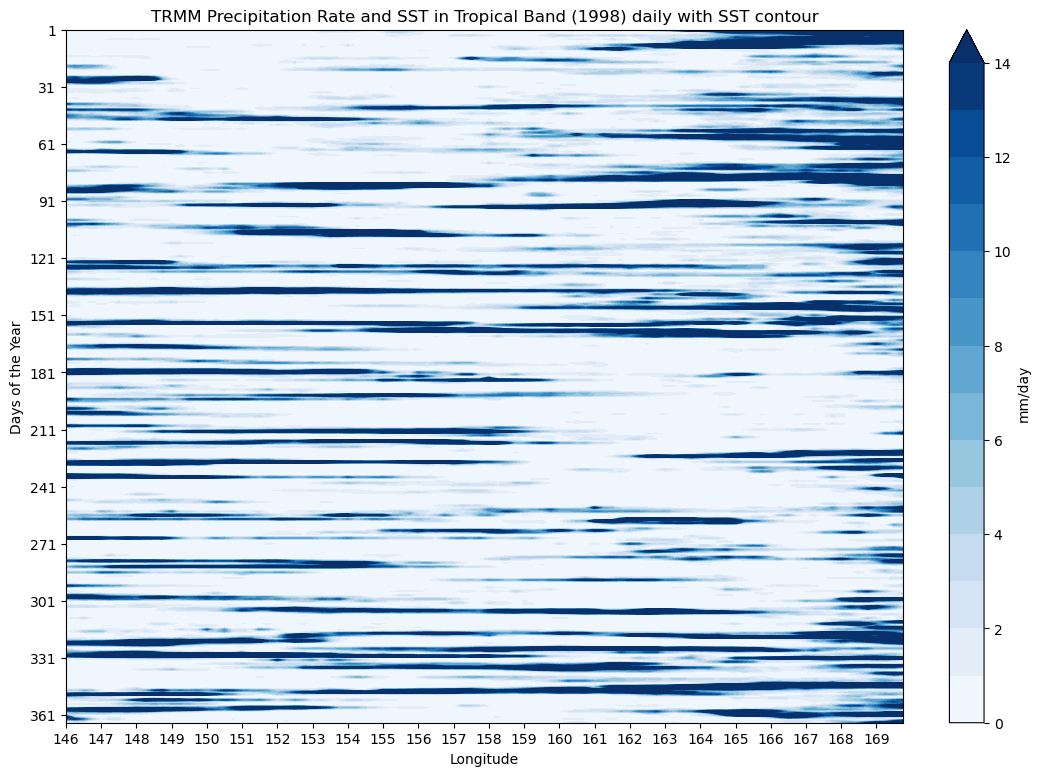

In [15]:
precipitation_dual_years_group = precip.sel(time=slice('1998-01-01', '1998-12-31'))
sst_oisst_dual_years_group = sst_oisst.sel(time=slice('1998-01-01', '1998-12-31'))

# Hovmoller diagram with Precipitation (countourf) and SST (contour)
precip_tropical_band = precipitation_dual_years_group.sel(lat=slice(-18,-15), lon=slice(146,170)).mean(dim='lat')

sst_tropical_band = sst_oisst_dual_years_group.sel(lat=slice(-18,-15), lon=slice(146,170)).mean(dim='lat')

figure, ax = plt.subplots(figsize=(12, 9))

levels = np.linspace(0, 14, 15)  
plt.contourf(precip_tropical_band, cmap='Blues', levels=levels, extend='max')
plt.colorbar(label='mm/day', pad=0.05, fraction=0.05)

# ax.clabel(plt.contour(sst_tropical_band, colors='red', linewidths=2, levels=np.arange(10, 35, 1), alpha=0.8), inline=True, fontsize=10, fmt='%.1f')

plt.xticks(np.arange(0, 96, 4), np.arange(146, 170, 1))
plt.yticks(np.arange(0, 365, 30), np.arange(1, 365, 30))

plt.title('TRMM Precipitation Rate and SST in Tropical Band (1998) daily with SST contour')
plt.xlabel('Longitude')
plt.ylabel('Days of the Year')
ax.invert_yaxis()  # This also works to invert the y-axis
plt.show()

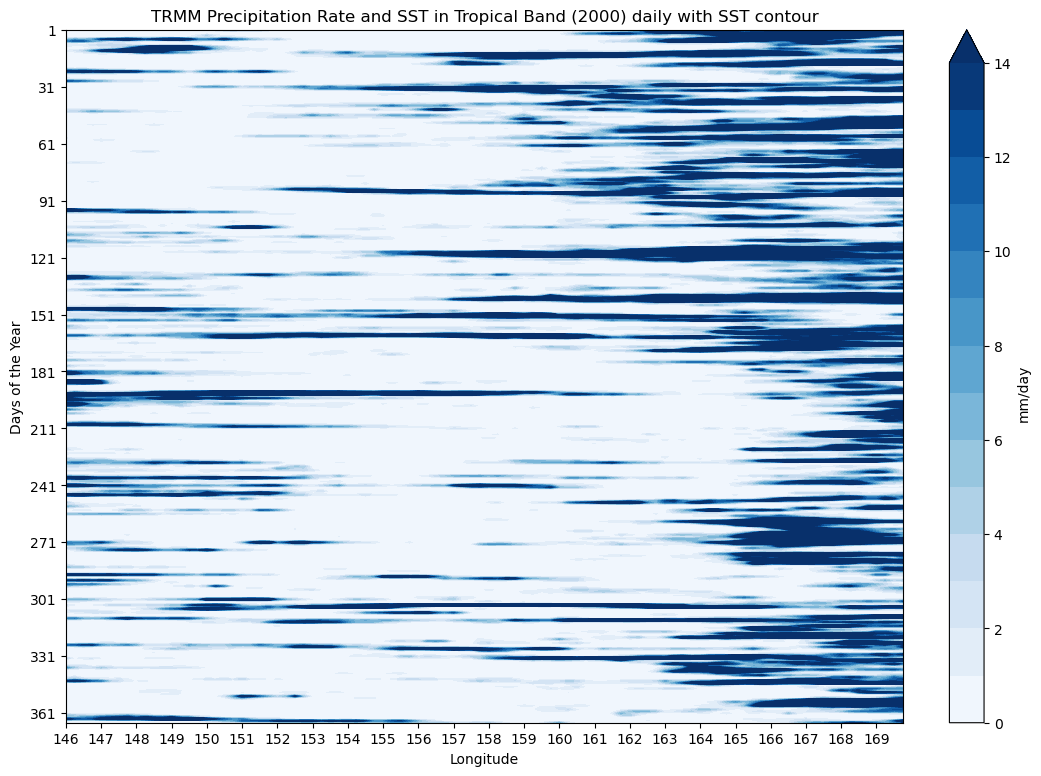

In [16]:
precipitation_dual_years_group = precip.sel(time=slice('2000-01-01', '2000-12-31'))
sst_oisst_dual_years_group = sst_oisst.sel(time=slice('2000-01-01', '2000-12-31'))

# Hovmoller diagram with Precipitation (countourf) and SST (contour)
precip_tropical_band = precipitation_dual_years_group.sel(lat=slice(-18,-15), lon=slice(146,170)).mean(dim='lat')

sst_tropical_band = sst_oisst_dual_years_group.sel(lat=slice(-18,-15), lon=slice(146,170)).mean(dim='lat')

figure, ax = plt.subplots(figsize=(12, 9))

levels = np.linspace(0, 14, 15)  
plt.contourf(precip_tropical_band, cmap='Blues', levels=levels, extend='max')
plt.colorbar(label='mm/day', pad=0.05, fraction=0.05)

# ax.clabel(plt.contour(sst_tropical_band, colors='red', linewidths=2, levels=np.arange(10, 35, 1), alpha=0.8), inline=True, fontsize=10, fmt='%.1f')

plt.xticks(np.arange(0, 96, 4), np.arange(146, 170, 1))
plt.yticks(np.arange(0, 365, 30), np.arange(1, 365, 30))

plt.title('TRMM Precipitation Rate and SST in Tropical Band (2000) daily with SST contour')
plt.xlabel('Longitude')
plt.ylabel('Days of the Year')
ax.invert_yaxis()  # This also works to invert the y-axis
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import os

def create_hovmoller_diagram(year, precipitation_data, sst_data, output_dir=None):
    """
    Create a Hovmoller diagram for a specific year.
    
    Parameters:
    -----------
    year : int
        The year to create the diagram for
    precipitation_data : xarray.Dataset
        The precipitation dataset
    sst_data : xarray.Dataset
        The SST dataset
    output_dir : str, optional
        Directory to save the figure, if None the figure is displayed but not saved
    """
    # Select data for the specified year
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    
    precipitation_year = precipitation_data.sel(time=slice(start_date, end_date))
    sst_year = sst_data.sel(time=slice(start_date, end_date))
    
    # Extract the tropical band for both datasets
    precip_tropical_band = precipitation_year.sel(lat=slice(-18,-15), lon=slice(146,170)).mean(dim='lat')
    sst_tropical_band = sst_year.sel(lat=slice(-18,-15), lon=slice(146,170)).mean(dim='lat')
    
    # Create the figure
    figure, ax = plt.subplots(figsize=(12, 9))
    
    # Plot precipitation with contourf
    levels = np.linspace(0, 14, 15)
    cf = plt.contourf(precip_tropical_band, cmap='Blues', levels=levels, extend='max')
    cbar = plt.colorbar(cf, label='mm/day', pad=0.05, fraction=0.05)
    
    # Add SST contours (commented out in the original code)
    # ct = ax.contour(sst_tropical_band, colors='red', linewidths=2, levels=np.arange(10, 35, 1), alpha=0.8)
    # ax.clabel(ct, inline=True, fontsize=10, fmt='%.1f')
    
    # Set up the axes
    plt.xticks(np.arange(0, 96, 4), np.arange(146, 170, 1))
    plt.yticks(np.arange(0, 365, 30), np.arange(1, 365, 30))
    
    plt.title(f'TRMM Precipitation Rate and SST in Tropical Band ({year}) daily')
    plt.xlabel('Longitude')
    plt.ylabel('Days of the Year')
    ax.invert_yaxis()
    
    # Save or display the figure
    if output_dir:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        plt.savefig(os.path.join(output_dir, f'hovmoller_{year}.png'), dpi=300, bbox_inches='tight')
        plt.close()
    else:
        plt.show()

# Main script to generate all diagrams
def generate_all_hovmoller_diagrams(precip, sst_oisst, start_year=1998, end_year=2019, output_dir='hovmoller_diagrams'):
    """
    Generate Hovmoller diagrams for all years in the range.
    
    Parameters:
    -----------
    precip : xarray.Dataset
        The precipitation dataset
    sst_oisst : xarray.Dataset
        The SST dataset
    start_year : int, optional
        The first year to generate a diagram for (default: 1998)
    end_year : int, optional
        The last year to generate a diagram for (default: 2022)
    output_dir : str, optional
        Directory to save the figures (default: 'hovmoller_diagrams')
    """
    for year in range(start_year, end_year + 1):
        print(f"Generating Hovmoller diagram for {year}...")
        create_hovmoller_diagram(year, precip, sst_oisst, output_dir)
    
    print(f"All diagrams have been generated and saved to {output_dir}")

# Call the function to generate all diagrams
# Uncomment the following line to run:
generate_all_hovmoller_diagrams(precip, sst_oisst)

# To generate a single year for testing:
# create_hovmoller_diagram(1998, precip, sst_oisst)

Generating Hovmoller diagram for 1998...
Generating Hovmoller diagram for 1999...
Generating Hovmoller diagram for 2000...
Generating Hovmoller diagram for 2001...
Generating Hovmoller diagram for 2002...
Generating Hovmoller diagram for 2003...
Generating Hovmoller diagram for 2004...
Generating Hovmoller diagram for 2005...
Generating Hovmoller diagram for 2006...
Generating Hovmoller diagram for 2007...
Generating Hovmoller diagram for 2008...
Generating Hovmoller diagram for 2009...
Generating Hovmoller diagram for 2010...
Generating Hovmoller diagram for 2011...
Generating Hovmoller diagram for 2012...
Generating Hovmoller diagram for 2013...
Generating Hovmoller diagram for 2014...
Generating Hovmoller diagram for 2015...
Generating Hovmoller diagram for 2016...
Generating Hovmoller diagram for 2017...
Generating Hovmoller diagram for 2018...
Generating Hovmoller diagram for 2019...
All diagrams have been generated and saved to hovmoller_diagrams
